# Covid19 - Real Time Monitoring and Analysis
## Realtime data from Folkhälsomyndigheten
Datafile source:
https://www.arcgis.com/sharing/rest/content/items/b5e7488e117749c19881cce45db13f7e/data

Realtime data from Folkhalsomyndigheten
https://experience.arcgis.com/experience/09f821667ce64bf7be6f9f87457ed9aa

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={"figure.figsize": (20, 10)})
sns.set_palette("deep", desat=0.5)
sns.set_style("darkgrid")
base_color = sns.color_palette()[0]
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [46]:
data = pd.read_excel('https://www.arcgis.com/sharing/rest/content/items/b5e7488e117749c19881cce45db13f7e/data')

# How does the data looks like?

In [47]:
data.head(10)

,Statistikdatum,Totalt_antal_fall,Blekinge,Dalarna,Gotland,Gävleborg,Halland,Jämtland_Härjedalen,Jönköping,Kalmar,...,Stockholm,Sörmland,Uppsala,Värmland,Västerbotten,Västernorrland,Västmanland,Västra_Götaland,Örebro,Östergötland
0,2020-02-04,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2020-02-05,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2020-02-06,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2020-02-07,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2020-02-08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2020-02-09,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2020-02-10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,2020-02-11,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,2020-02-12,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,2020-02-13,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Number of Days and Regions recorded

In [48]:
days = data.shape[0]
regions = data.shape[1] 

print ("Total number of days recorded: {}".format(days))
print ("Number of regions: {}".format(regions))


Total number of days recorded: 62
Number of regions: 23


# Count, Mean and Standard Deviations by Region

In [49]:
data.describe()

,Totalt_antal_fall,Blekinge,Dalarna,Gotland,Gävleborg,Halland,Jämtland_Härjedalen,Jönköping,Kalmar,Kronoberg,...,Stockholm,Sörmland,Uppsala,Värmland,Västerbotten,Västernorrland,Västmanland,Västra_Götaland,Örebro,Östergötland
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,...,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,110.161290,0.500000,2.854839,0.193548,2.822581,2.048387,1.435484,3.596774,0.790323,0.790323,...,48.645161,6.838710,4.725806,0.887097,1.838710,1.064516,2.258065,9.048387,2.774194,10.387097
std,154.103988,1.238058,5.389263,0.623020,5.611826,3.451906,2.701675,6.663971,1.427334,1.590310,...,67.541875,14.712762,8.026941,1.829672,3.729341,2.317934,5.419865,12.882098,5.637751,17.374708
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.500000,0.000000,0.000000
75%,151.750000,0.000000,3.000000,0.000000,2.750000,3.000000,2.000000,4.000000,1.000000,1.000000,...,69.750000,5.000000,5.000000,1.000000,2.000000,1.000000,1.000000,14.750000,3.000000,13.000000
max,607.000000,6.000000,22.000000,4.000000,30.000000,16.000000,14.000000,32.000000,6.000000,7.000000,...,251.000000,60.000000,38.000000,11.000000,17.000000,13.000000,27.000000,57.000000,28.000000,71.000000


# Correlation > Region - Number of cases
[Description]

In [50]:
# Create a data correlation dataframe:
corr_df_master = data.corr()
corr_target = corr_df_master.iloc[0][:] # The correlation target is the 'Totalt_antal_fall' column 
corr = corr_target.sort_values(ascending=True)
corr_df = pd.DataFrame(corr)
corr_df.reset_index(level=0, inplace=True)
corr_df.columns = ['features', 'correlation']
corr_df

,features,correlation
0,Värmland,0.179663
1,Gotland,0.302575
2,Jämtland_Härjedalen,0.365113
3,Skåne,0.389464
4,Blekinge,0.555156
5,Västernorrland,0.629314
6,Kronoberg,0.687189
7,Halland,0.724998
8,Västerbotten,0.765797
9,Kalmar,0.792931


# Distribution of Correlations
[Description]

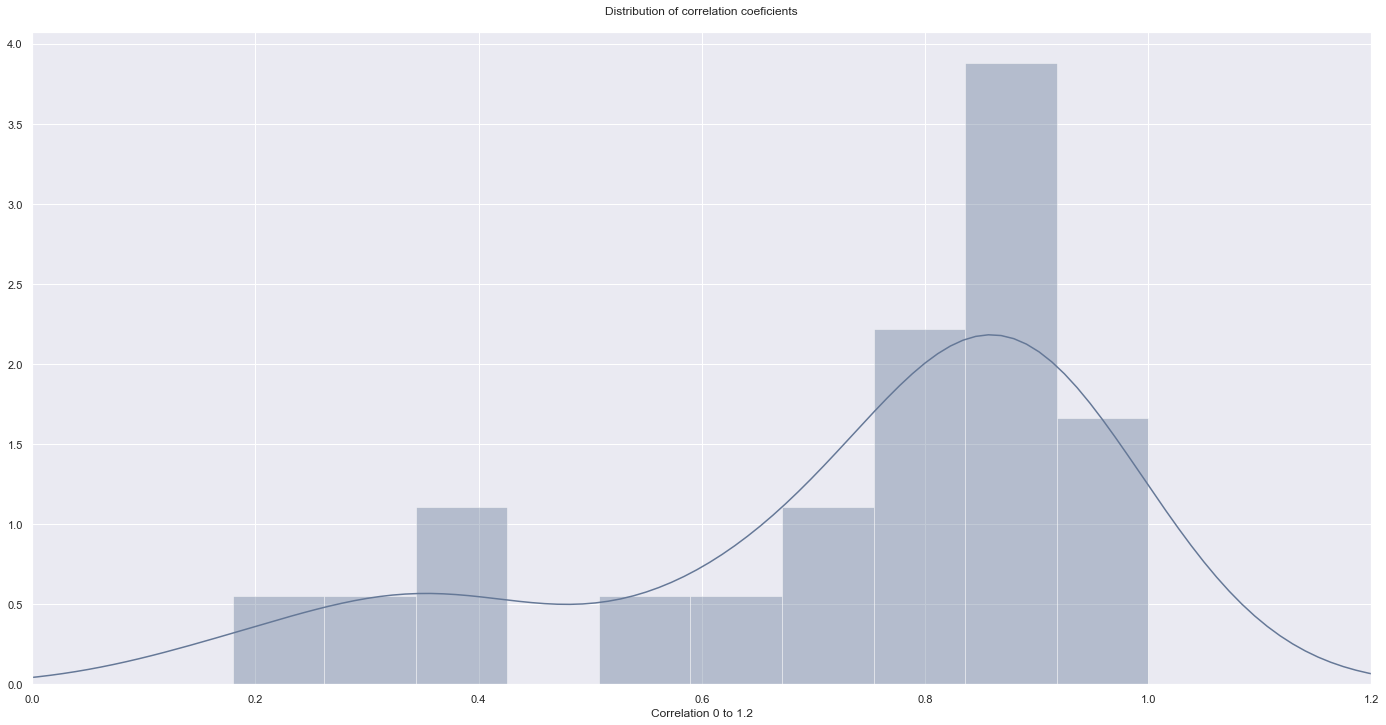

In [51]:
# Observing the distribution of correlation coeficients
fig, ax = plt.subplots(figsize=(24, 12))
sns.distplot(corr_df.correlation, kde=True, bins = 10, ax=ax)
plt.xlim([0, 1.2])
plt.xlabel('Correlation 0 to 1.2')
ax.set_title("Distribution of correlation coeficients\n");

# Correlations - Linear View

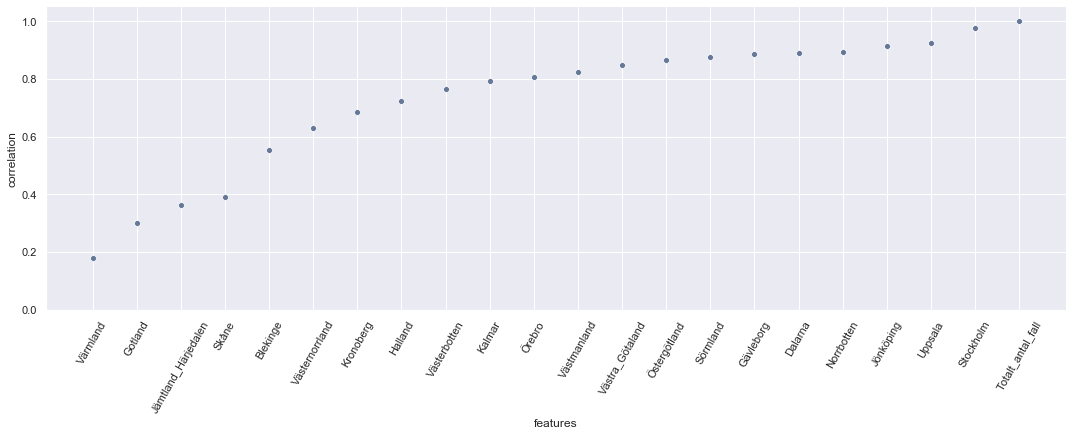

In [52]:
sns.relplot(x='features', y='correlation', data=corr_df, aspect=3)
plt.ylim([0, 1.05]) 
plt.xticks(rotation=60);

# Amount of Cases by Day

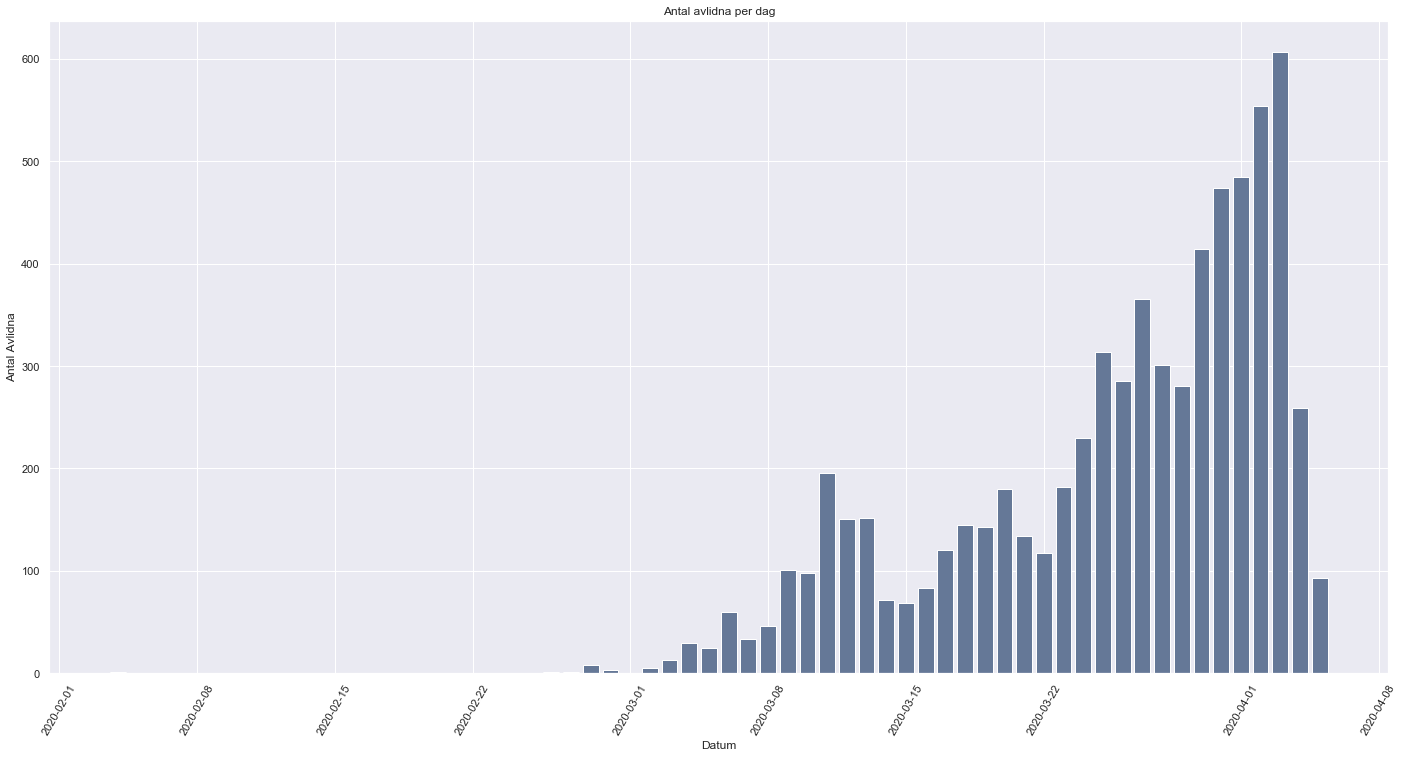

In [53]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(24, 12))

# Add x-axis and y-axis
ax.bar(data.Statistikdatum.values,
       data['Totalt_antal_fall'])

# Set title and labels for axes
ax.set(xlabel="Datum",
       ylabel="Antal Avlidna",
       title="Antal avlidna per dag")
plt.xticks(rotation=60);
plt.show()

In [54]:
region = data.iloc[:, 2:]
region

,Blekinge,Dalarna,Gotland,Gävleborg,Halland,Jämtland_Härjedalen,Jönköping,Kalmar,Kronoberg,Norrbotten,...,Stockholm,Sörmland,Uppsala,Värmland,Västerbotten,Västernorrland,Västmanland,Västra_Götaland,Örebro,Östergötland
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,5,19,0,30,4,0,13,5,1,5,...,206,49,24,2,5,2,11,28,5,63
58,3,6,0,17,9,3,32,5,7,8,...,216,34,28,0,12,1,18,48,28,71
59,1,20,0,16,12,2,29,2,2,6,...,251,59,38,1,17,3,27,48,21,28
60,0,9,0,12,1,2,7,1,0,2,...,130,1,5,1,17,4,0,11,0,53


In [55]:
region.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 21 columns):
Blekinge               62 non-null int64
Dalarna                62 non-null int64
Gotland                62 non-null int64
Gävleborg              62 non-null int64
Halland                62 non-null int64
Jämtland_Härjedalen    62 non-null int64
Jönköping              62 non-null int64
Kalmar                 62 non-null int64
Kronoberg              62 non-null int64
Norrbotten             62 non-null int64
Skåne                  62 non-null int64
Stockholm              62 non-null int64
Sörmland               62 non-null int64
Uppsala                62 non-null int64
Värmland               62 non-null int64
Västerbotten           62 non-null int64
Västernorrland         62 non-null int64
Västmanland            62 non-null int64
Västra_Götaland        62 non-null int64
Örebro                 62 non-null int64
Östergötland           62 non-null int64
dtypes: int64(21)
memory usage: 10.3

# Amount of Cases by Region


In [56]:
region = region.sum(axis = 0, skipna = True) 
region = pd.DataFrame(region)
region.reset_index(level=0, inplace=True)
region.columns = ['region', 'cases']
region = region.sort_values(by='cases', ascending=False)
region

,region,cases
11,Stockholm,3016
20,Östergötland,644
18,Västra_Götaland,561
12,Sörmland,424
10,Skåne,333
13,Uppsala,293
6,Jönköping,223
1,Dalarna,177
3,Gävleborg,175
19,Örebro,172


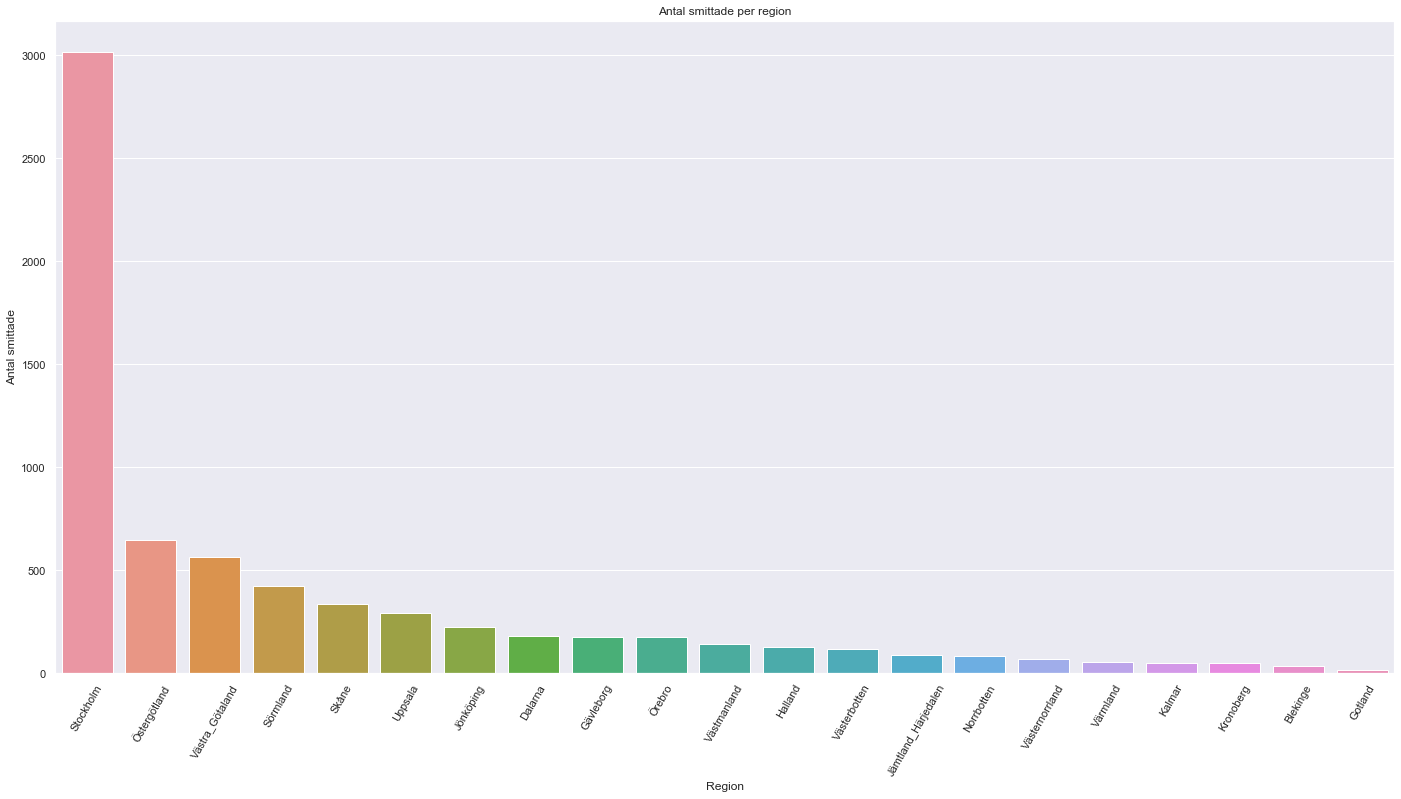

In [57]:
fig, ax = plt.subplots(figsize=(24, 12))
ax = sns.barplot(x="region", y="cases", data=region)
ax.set(xlabel="Region",
       ylabel="Antal smittade",
       title="Antal smittade per region")
plt.xticks(rotation=60);